#Description

Our study is unique in that we use the Extracted_Business_Description.csv dataset, which is comprised solely of company descriptions and is suitable for unsupervised learning, specifically clustering. To embed the descriptions, we utilize a sentence transformer, specifically the 'all-mpnet-base-v2' model. We perform agglomerative clustering with 11 clusters, corresponding to the number of sectors under analysis. We then use TF-IDF to identify the most frequent words in each cluster. In addition, we also explore the case where the dimensions are reduced to two dimensions.

#Preprocessing the dataset

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

In [24]:
data = pd.read_csv("/content/drive/MyDrive/datasets/Extracted_Business_Description.csv")
data.head()

,Unnamed: 0,docLabels,Descriptions,Company Tickers,Company Names
0,0,0,"1-800-Flowers.com, Inc., together with its sub...",NasdaqGS:FLWS,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)"
1,1,1,"12 Retech Corporation, through its subsidiarie...",OTCPK:RETC,12 Retech Corporation (OTCPK:RETC)
2,2,2,"1347 Property Insurance Holdings, Inc., throug...",NasdaqGM:PIH,"1347 Property Insurance Holdings, Inc. (Nasdaq..."
3,3,3,"1847 Holdings LLC, through its subsidiaries, p...",OTCPK:EFSH,1847 Holdings LLC (OTCPK:EFSH)
4,4,4,1mage Software Inc operates in the technology ...,OTCPK:ISOL,"1mage Software, Inc. (OTCPK:ISOL)"


In [25]:
data = data[data.columns[2:3]]

In [26]:
pip install -U sentence-transformers

#Embedding the sentences

In [27]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import os
import re
from sentence_transformers import SentenceTransformer

In [28]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(data["Descriptions"].values)
embeddings

array([[ 1.7569924e-02,  2.2134138e-02,  9.2729997e-06, ...,
        -3.3634692e-02,  3.9170481e-02, -1.6132956e-02],
       [ 2.0520430e-02, -2.8086318e-02, -4.3370929e-02, ...,
         1.9391578e-02, -3.1290624e-02, -2.5661658e-02],
       [-3.5959776e-02,  2.6601275e-02, -2.6221666e-03, ...,
        -4.3030689e-03, -1.1766441e-02,  4.4427071e-02],
       ...,
       [ 2.1262582e-02,  1.3054322e-02, -3.3657306e-03, ...,
        -4.8901156e-02,  1.6439995e-02, -7.6993726e-02],
       [-1.0434607e-02, -4.5385808e-02, -6.1709997e-03, ...,
        -3.3510022e-03, -3.1583093e-02, -2.0237675e-02],
       [ 4.4201888e-02, -3.0306680e-02, -2.0918649e-02, ...,
         2.2588855e-02, -2.4629861e-02, -4.4372816e-02]], dtype=float32)

#Agglomerative Clustering

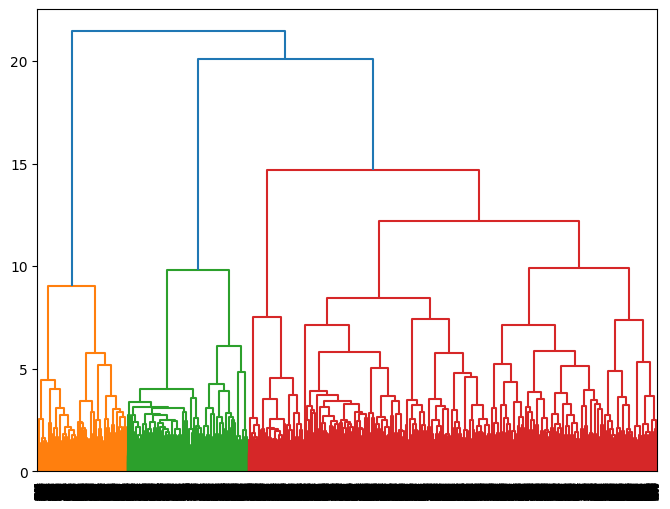

In [29]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

clusters = hierarchy.linkage(embeddings, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [30]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

new = embeddings
# pca = PCA(2)
# new = pca.fit_transform(embeddings)

connectivity = kneighbors_graph(new, n_neighbors=10, include_self=False)

#Based on the dendrogram (looking at the second line), the number of clusters is 13 but the dividing line nearly matches one of the line of division of clusters
#If you take out that division, the number of clusters is 11 - the same as number of sectors based of GICS
model = AgglomerativeClustering(n_clusters=11, connectivity=connectivity, linkage='ward').fit(new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


In [31]:
model.labels_

array([2, 0, 5, ..., 2, 8, 2])

In [32]:
label = model.fit_predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:282: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


#Most frequent words in each cluster

In [33]:
label0 = []
label1 = []
label2 = []
label3 = []
label4 = []
label5 = []
label6 = []
label7 = []
label8 = []
label9 = []
label10 = []

In [34]:
for i in range(len(label)):
  if label[i] == 0:
    label0.append(data["Descriptions"][i])
  if label[i] == 1:
    label1.append(data["Descriptions"][i])
  if label[i] == 2:
    label2.append(data["Descriptions"][i])
  if label[i] == 3:
    label3.append(data["Descriptions"][i])
  if label[i] == 4:
    label4.append(data["Descriptions"][i])
  if label[i] == 5:
    label5.append(data["Descriptions"][i])
  if label[i] == 6:
    label6.append(data["Descriptions"][i])
  if label[i] == 7:
    label7.append(data["Descriptions"][i])
  if label[i] == 8:
    label8.append(data["Descriptions"][i])
  if label[i] == 9:
    label9.append(data["Descriptions"][i])
  if label[i] == 10:
    label10.append(data["Descriptions"][i])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [36]:
def finding_top_features(key, dataset):
  my_stop_words = list(text.ENGLISH_STOP_WORDS.union(["company"]))
  vectorizer = TfidfVectorizer(stop_words=my_stop_words)
  tfidf_matrix = vectorizer.fit_transform(dataset)
  feature_names = vectorizer.get_feature_names_out()
  feature_scores = tfidf_matrix.mean(axis=0).tolist()[0]
  features_dict = dict(zip(feature_names, feature_scores))
  sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)
  top_features = [(feature, score) for feature, score in sorted_features[:10]]

  dictionary = {}
  dictionary[key] = top_features
  print(dictionary)

In [37]:
new_labels = {"label0" : label0,
              "label1" : label1,
              "label2" : label2,
              "label3" : label3,
              "label4" : label4,
              "label5" : label5,
              "label6" : label6,
              "label7" : label7,
              "label8" : label8,
              "label9" : label9,
              "label10" : label10}

In [38]:
for key in new_labels.keys():
  finding_top_features(key, new_labels[key])

{'label0': [('services', 0.05704788431515655), ('solutions', 0.03247138251987082), ('products', 0.029983243817317432), ('provides', 0.029727447218923127), ('management', 0.027448285263658542), ('offers', 0.025142864911157862), ('software', 0.024954012989474063), ('based', 0.024373586538728086), ('data', 0.022062299734726214), ('mobile', 0.021800907449643685)]}
{'label1': [('products', 0.05047442864657755), ('services', 0.04262025812997212), ('segment', 0.03215466404964206), ('systems', 0.024923530963400147), ('provides', 0.022553986935550357), ('offers', 0.02249810628874278), ('equipment', 0.022378281790143107), ('industrial', 0.020106112741174142), ('corporation', 0.01963439808123877), ('operates', 0.019007812061606698)]}
{'label2': [('products', 0.05596961493034795), ('stores', 0.030639028617068707), ('based', 0.022269919426570674), ('operates', 0.021283500942428136), ('offers', 0.0210900917999121), ('services', 0.0210253218142753), ('states', 0.02049434028706807), ('food', 0.0203072

#Visualization with T-SNE

In [39]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

label0_embeddings = model.encode(new_labels["label0"])
label1_embeddings = model.encode(new_labels["label1"])
label2_embeddings = model.encode(new_labels["label2"])
label3_embeddings = model.encode(new_labels["label3"])
label4_embeddings = model.encode(new_labels["label4"])
label5_embeddings = model.encode(new_labels["label5"])
label6_embeddings = model.encode(new_labels["label6"])
label7_embeddings = model.encode(new_labels["label7"])
label8_embeddings = model.encode(new_labels["label8"])
label9_embeddings = model.encode(new_labels["label9"])
label10_embeddings = model.encode(new_labels["label10"])

In [40]:
list_of_embeddings = [
    label0_embeddings,
    label1_embeddings,
    label2_embeddings,
    label3_embeddings,
    label4_embeddings,
    label5_embeddings,
    label6_embeddings,
    label7_embeddings,
    label8_embeddings,
    label9_embeddings,
    label10_embeddings
]

In [41]:
combined_embeddings = np.concatenate(list_of_embeddings, axis=0)

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, init='pca', n_iter=3000)

tsne_results = tsne.fit_transform(combined_embeddings)

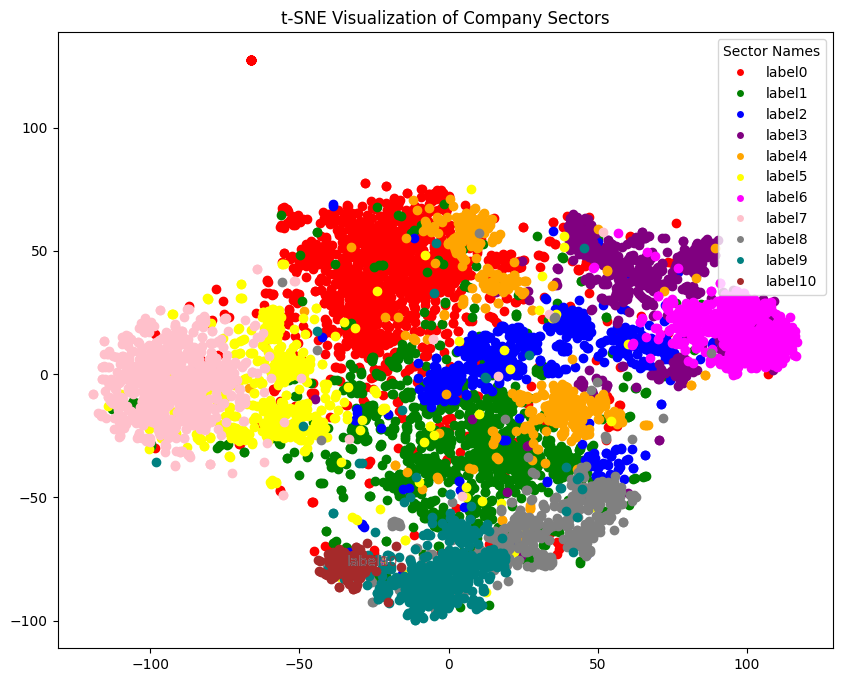

In [46]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'magenta', 'pink', 'gray', 'teal', 'brown']  # Custom colors for dots

start_index = 0
annotations = []

for i, embeddings in enumerate(list_of_embeddings):
    num_embeddings = embeddings.shape[0]
    plt.scatter(
        tsne_results[start_index : start_index + num_embeddings, 0],
        tsne_results[start_index : start_index + num_embeddings, 1],
        color=colors[i],
    )
    annotations.append(list(new_labels.keys())[i])
    start_index += num_embeddings

for i, name in enumerate(list(new_labels.keys())):
    annotation_x = np.median(tsne_results[start_index - num_embeddings : start_index, 0])
    annotation_y = np.median(tsne_results[start_index - num_embeddings : start_index, 1])
    plt.annotate(
        name,
        (annotation_x, annotation_y),
        color=colors[i],
        fontsize=10,
        alpha=0.7,
    )

plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=name) for i, name in enumerate(annotations)],
    loc='upper right',
    title='Sector Names',
)

plt.title("t-SNE Visualization of Company Sectors")
plt.show()


In [47]:
for key in new_labels.keys():
  finding_top_features(key, new_labels[key])

{'label0': [('services', 0.05704788431515655), ('solutions', 0.03247138251987082), ('products', 0.029983243817317432), ('provides', 0.029727447218923127), ('management', 0.027448285263658542), ('offers', 0.025142864911157862), ('software', 0.024954012989474063), ('based', 0.024373586538728086), ('data', 0.022062299734726214), ('mobile', 0.021800907449643685)]}
{'label1': [('products', 0.05047442864657755), ('services', 0.04262025812997212), ('segment', 0.03215466404964206), ('systems', 0.024923530963400147), ('provides', 0.022553986935550357), ('offers', 0.02249810628874278), ('equipment', 0.022378281790143107), ('industrial', 0.020106112741174142), ('corporation', 0.01963439808123877), ('operates', 0.019007812061606698)]}
{'label2': [('products', 0.05596961493034795), ('stores', 0.030639028617068707), ('based', 0.022269919426570674), ('operates', 0.021283500942428136), ('offers', 0.0210900917999121), ('services', 0.0210253218142753), ('states', 0.02049434028706807), ('food', 0.0203072